# Exercise 2 - Decision Trees

In [1]:
#Import libraries for working with the datasets
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

#Import functions used to display the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#Fix for Anaconda not properly installing graphviz
import os     
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'

## Golf

In [2]:
golf_dataset = pd.read_csv('PlayGolf_nominal.csv')
golf_dataset

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
yes_no_mapping = {'yes': True, 'no': False}

target = golf_dataset['Play'].map(yes_no_mapping)
target

0     False
1     False
2      True
3      True
4      True
5     False
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13    False
Name: Play, dtype: bool

Converting the nominal data to a numerical representation

In [4]:
data_nominal = golf_dataset.loc[:, 'Outlook':'Windy']
encoder = LabelEncoder()

data = data_nominal.apply(encoder.fit_transform)
data

,Outlook,Temperature,Humidity,Windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


Splitting the dataset into a training set and a test set.

In [5]:
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=1)

In [6]:
data_train

,Outlook,Temperature,Humidity,Windy
10,2,2,1,1
4,1,0,1,0
1,2,1,0,1
12,0,1,1,0
0,2,1,0,0
13,1,2,0,1
9,1,2,1,0
8,2,0,1,0
11,0,2,0,1
5,1,0,1,1


In [7]:
target_train

10     True
4      True
1     False
12     True
0     False
13    False
9      True
8      True
11     True
5     False
Name: Play, dtype: bool

Unfortunately I could not find out how to use the error rate as a classification criterion. There seems to be a way that allows hooking into the classifier and provide a custom criterion but even after spending several hours I could not get it to work. https://github.com/scikit-learn/scikit-learn/issues/10251 

In [8]:
estimator = DecisionTreeClassifier(criterion='entropy')
estimator.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
target_test

3     True
7    False
6     True
2     True
Name: Play, dtype: bool

Now to test the decision tree.

In [10]:
estimator.predict(data_test)

array([False, False, False,  True])

In [11]:
estimator.score(data_test, target_test)

0.5

It seems that we are only correct in 50% of cases.

In [12]:
def display_tree(estimator):
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()
    

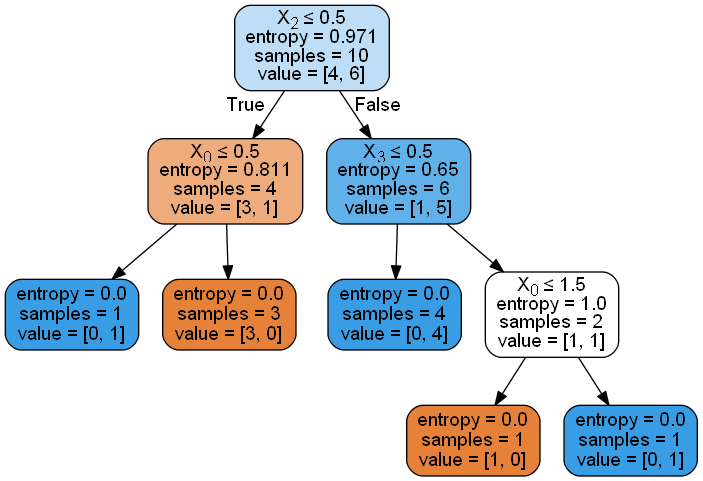

In [13]:
Image(display_tree(estimator))

## Miles per Gallon

In [14]:
mpg_dataset = pd.read_csv('mpg_dataSet.csv')
mpg_dataset

,cylinders,displacement,horse power,weight,accelleration,Model year,maker,MpG
0,4,low,low,low,high,75-78,Asia,good
1,6,medium,medium,medium,medium,70-74,America,bad
2,4,medium,medium,medium,low,75-78,Europe,bad
3,8,high,high,high,low,70-74,America,bad
4,6,medium,medium,medium,medium,70-74,America,bad
5,4,low,medium,low,medium,70-74,Asia,bad
6,4,low,medium,low,low,70-74,Asia,bad
7,8,high,high,high,low,75-78,America,bad
8,8,high,high,high,low,70-74,America,bad
9,8,high,medium,high,high,79-83,America,good


In [15]:
good_bad_mapping = {'good': True, 'bad': False}

target = mpg_dataset['MpG'].map(good_bad_mapping)
target

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11     True
12    False
13     True
14     True
15    False
16     True
17    False
Name: MpG, dtype: bool

In [16]:
data_nominal = mpg_dataset.loc[:, 'cylinders':'maker']
encoder = LabelEncoder()

data = data_nominal.apply(encoder.fit_transform)
data

,cylinders,displacement,horse power,weight,accelleration,Model year,maker
0,0,1,1,1,0,1,1
1,2,2,2,2,2,0,0
2,0,2,2,2,1,1,2
3,3,0,0,0,1,0,0
4,2,2,2,2,2,0,0
5,0,1,2,1,2,0,1
6,0,1,2,1,1,0,1
7,3,0,0,0,1,1,0
8,3,0,0,0,1,0,0
9,3,0,2,0,0,2,0


In [17]:
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=1)

In [18]:
data_train

,cylinders,displacement,horse power,weight,accelleration,Model year,maker
7,3,0,0,0,1,1,0
15,3,0,0,0,1,0,0
4,2,2,2,2,2,0,0
1,2,2,2,2,2,0,0
10,3,0,0,0,1,1,0
0,0,1,1,1,0,1,1
17,1,2,2,2,2,1,2
16,0,1,2,1,2,1,2
9,3,0,2,0,0,2,0
8,3,0,0,0,1,0,0


In [19]:
target_train

7     False
15    False
4     False
1     False
10    False
0      True
17    False
16     True
9      True
8     False
12    False
11     True
5     False
Name: MpG, dtype: bool

In [20]:
estimator = DecisionTreeClassifier(criterion='entropy')
estimator.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
estimator.predict(data_test)

array([False, False,  True,  True,  True])

In [22]:
estimator.score(data_test, target_test)

0.8

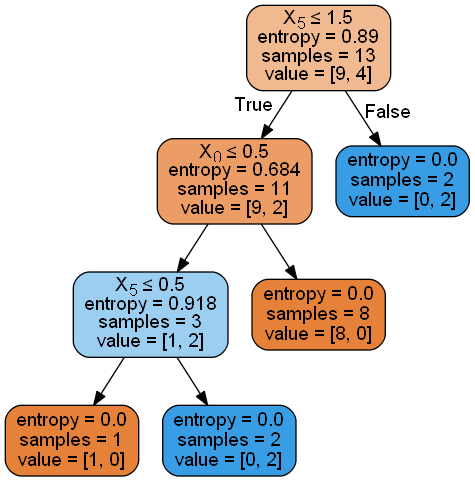

In [23]:
Image(display_tree(estimator))

## Sources
* https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
* https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
* https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python#question1
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
* https://stackoverflow.com/questions/48868524/graphvizs-executables-not-found
* https://github.com/scikit-learn/scikit-learn/issues/10251